<a href="https://colab.research.google.com/github/isabellamwright/project_gss/blob/main/Copy_of_GSS__Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! git clone https://www.github.com/DS3001/project_gss

fatal: destination path 'project_gss' already exists and is not an empty directory.


##Does religion correlate with people's opinions on capital punishment?##

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('selected_gss_data (4).csv',low_memory=False)

In [8]:
print(df.shape)
print(df.dtypes)
df.head()

(72392, 4)
cappun    object
relig     object
age       object
educ      object
dtype: object


,cappun,relig,age,educ
0,NaN,jewish,23.0,16.0
1,NaN,catholic,70.0,10.0
2,NaN,protestant,48.0,12.0
3,NaN,other,27.0,17.0
4,NaN,protestant,61.0,12.0


In [9]:
relig = df['relig']
relig.unique()

array(['jewish', 'catholic', 'protestant', 'other', 'none', nan, 'relig',
       'inter-nondenominational', 'christian', 'muslim/islam', 'buddhism',
       'orthodox-christian', 'native american', 'hinduism',
       'other eastern religions'], dtype=object)

In [10]:
cappun = df['cappun']
cappun.unique()

array([nan, 'favor', 'oppose', 'cappun'], dtype=object)

In [11]:
#cleaning data - combining religion variables
difrelig = df['relig'] # Create a temporary vector of values for the relig variable to play with

difrelig = difrelig.replace(['catholic', 'protestant','inter-nondenominational','christian', 'orthodox-christian'],'christian') # All christian values

difrelig = difrelig.replace(['other', 'relig', 'other eastern religions'], 'Other Religions')

df['relig'] = difrelig # Replace the 'difrelif' variable with the cleaned version
df['relig'].value_counts()

christian          58702
none                9895
jewish              1421
Other Religions     1270
buddhism             272
muslim/islam         201
hinduism             158
native american       36
Name: relig, dtype: int64

In [12]:
#grouped data - combining certain religion variables
difrelig = df['relig'] # Create a temporary vector of values for the relig variable to play with

difrelig = difrelig.replace(['catholic', 'protestant','inter-nondenominational','christian', 'orthodox-christian'],'christian') # All christian values

difrelig = difrelig.replace(['other', 'relig', 'other eastern religions'], 'Other Religions')

df['difrelig'] = difrelig # create a new column 'difrelif' variable with the grouped version
df['difrelig'].value_counts()

christian          58702
none                9895
jewish              1421
Other Religions     1270
buddhism             272
muslim/islam         201
hinduism             158
native american       36
Name: difrelig, dtype: int64

It can be seen that the Chrisianity category has comined all of the denomination. It can also be see that the "Other Religion" Cateogry now contains all ambiguous religion values.

In [13]:
df['relig'].isna().sum() #count the nans in the religion column

437

There are 437 NaN values in the religion category. This is less than 1% of the observations, so we can drop these values.

In [14]:
df = df.dropna(subset=["relig"])
df['relig'].isna().sum() # now we can see that there are no NaN values for religion

0

It looks like there's quite a few NaNs as well as some values "cappun". "cappun" as an entry doesn't make sense and since there is only 2 we will drop the rows with that entry.

In [15]:
df = df.drop(df[df['cappun'] == 'cappun'].index)

In [16]:
print(pd.crosstab(df['cappun'],df['relig']),'\n')

relig   Other Religions  buddhism  christian  hinduism  jewish  muslim/islam  \
cappun                                                                         
favor               688       121      34977        73     772            93   
oppose              379       107      14193        63     384            81   

relig   native american  none  
cappun                         
favor                16  5228  
oppose               15  3329   



It looks like buddhists, hinduists, inter-nondenominational, muslim, and native americans slightly favor the death penalty. Catholics, christians, jewish people, non-religious people, orthodox christians, protestant, and other strongly favor the death penalty. No group opposes it more than they favor it.

##Visualizations##

<ipython-input-17-bdd0492dfeb5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'christian'),
 Text(2, 0, 'Other Religions'),
 Text(3, 0, 'none'),
 Text(4, 0, 'muslim/islam'),
 Text(5, 0, 'buddhism'),
 Text(6, 0, 'native american'),
 Text(7, 0, 'hinduism')]

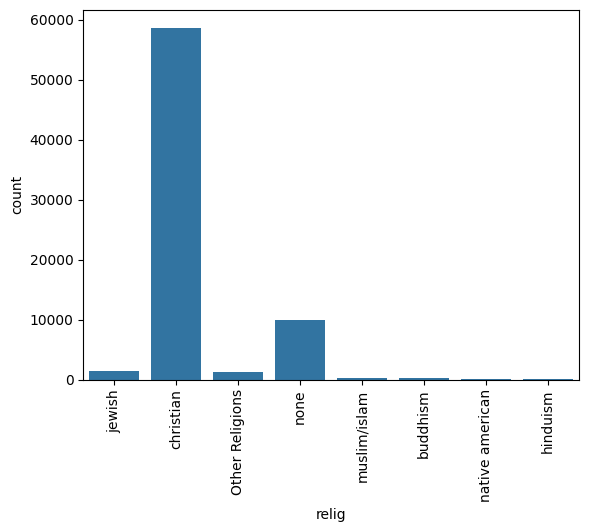

In [17]:
my_plot = sns.countplot(df, x="relig")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

We can see that a large portion of the people surveyed were protestant, with the second largets group being catholic, and the third largest group being no religion.

<ipython-input-18-3c51b6b2605f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'christian'),
 Text(2, 0, 'Other Religions'),
 Text(3, 0, 'none'),
 Text(4, 0, 'muslim/islam'),
 Text(5, 0, 'buddhism'),
 Text(6, 0, 'native american'),
 Text(7, 0, 'hinduism')]

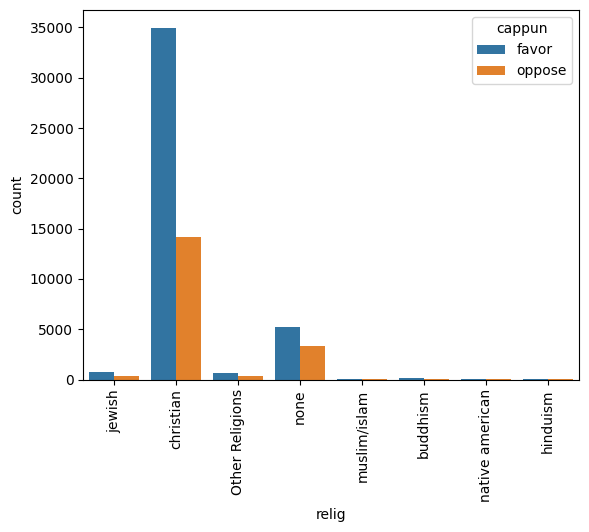

In [18]:
my_plot = sns.countplot(df, x="relig", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

##Does religion correlate with people's age? What about opinion on capital punishment##

In [28]:
df.sort_values(by='age', inplace=True)

In [55]:
df.sort_values(by='educ', inplace=True)

In [56]:
age = df['age']
age.unique()

array([45., 37., 65., 47., 35., 54., 38., 81., 64., 86., 41., 34., 56.,
       62., 59., 82., 67., 63., 75., 22., 76., 78., 89., 69., 55., 74.,
       19., 26., 83., 51., 57., 72., 53., 49., 79., 73., 58., 50., 60.,
       61., 87., 44., 84., 77., 85., 43., 68., 80., 66., 70., 71., 52.,
       33., 40., 28., 23., 48., 21., 39., 27., 36., 42., 20., 46., 24.,
       25., 88., 30., 32., 29., 31., 18.])

In [57]:
education = df['educ']
education.unique()

array(['0.0', '1.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0',
       '16.0', '17.0', '18.0', '19.0', '2.0', '20.0', '3.0', '4.0', '5.0',
       '6.0', '7.0', '8.0', '9.0'], dtype=object)

In [58]:
df['educ'].isna().sum() #count the nans in the educ column

0

In [59]:
df['age'].isna().sum() #count the nans in the age column

0

In [60]:
df = df.dropna(subset=["educ"])
df['educ'].isna().sum() # now we can see that there are no NaN values for educ

0

In [61]:
df = df.dropna(subset=["age"])
df['age'].isna().sum() # now we can see that there are no NaN values for age

0

In [62]:
# grouping age groups
bins = [18,30, 40, 50, 60, 70, 80, 90]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Try to convert 'age' to integers, handle errors by setting to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN values in 'age' column
df = df.dropna(subset=['age'])

# Apply age binning
df['difage'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df['difage'].value_counts())


31-40    14892
18-30    14279
41-50    12709
51-60    11005
61-70     9271
71-80     6241
81-90     2731
Name: difage, dtype: int64


In [69]:

# Try to convert 'educ' to integers, handle errors by setting to NaN
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')

# Drop rows with NaN values in 'age' column
df = df.dropna(subset=['educ'])

print(df['educ'].value_counts())

12.0    21134
16.0     9809
14.0     8056
13.0     5817
11.0     3922
15.0     3265
10.0     2990
18.0     2875
8.0      2768
17.0     2347
9.0      2159
20.0     1768
19.0     1093
7.0       893
6.0       862
5.0       408
4.0       323
3.0       266
0.0       169
2.0       156
1.0        48
Name: educ, dtype: int64


In [63]:
print(pd.crosstab(df['difage'],df['relig']),'\n')

relig   Other Religions  buddhism  christian  hinduism  jewish  muslim/islam  \
difage                                                                         
18-30               336        49      10739        36     211            41   
31-40               350        61      11622        52     244            70   
41-50               255        51      10375        29     223            47   
51-60               159        41       9314        10     238            28   
61-70                89        32       8047         9     232             6   
71-80                46        24       5558         8     165             2   
81-90                14        10       2455         5      85             1   

relig   native american  none  
difage                         
18-30                 9  2858  
31-40                 7  2486  
41-50                 9  1720  
51-60                 4  1211  
61-70                 6   850  
71-80                 1   437  
81-90                 0

Seems like a lot of people between 18-50 are Christian.

In [64]:
print(pd.crosstab(df['educ'],df['relig']),'\n')

relig  Other Religions  buddhism  christian  hinduism  jewish  muslim/islam  \
educ                                                                          
0.0                  2         2        145         1       5             2   
1.0                  0         0         46         0       0             0   
10.0                29         5       2591         1      14             4   
11.0                66         9       3292         4      26             3   
12.0               297        32      18216        12     206            40   
13.0               102        14       4789         4      93            19   
14.0               154        37       6466         5     154            29   
15.0                93        13       2473         7      68            14   
16.0               192        76       7396        41     358            39   
17.0                66        16       1712        15      90            12   
18.0                72        23       2068        2

In [65]:
df['educ'].describe()

count     71128
unique       21
top        12.0
freq      21134
Name: educ, dtype: object

Most frequent education is 12 years (highschool level education)

<ipython-input-49-6073ae5caef2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '18-30'),
 Text(1, 0, '31-40'),
 Text(2, 0, '41-50'),
 Text(3, 0, '51-60'),
 Text(4, 0, '61-70'),
 Text(5, 0, '71-80'),
 Text(6, 0, '81-90')]

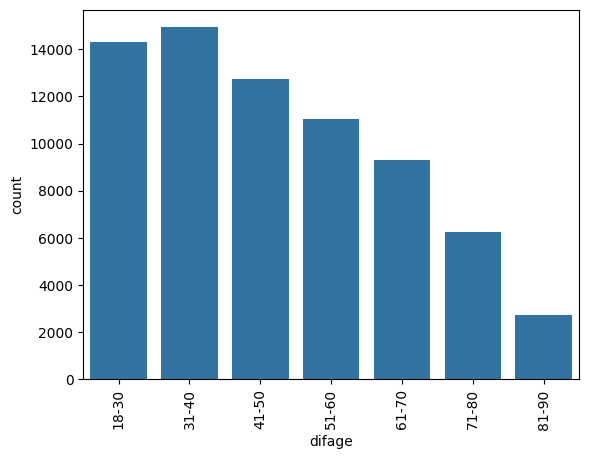

In [49]:
my_plot = sns.countplot(df, x="difage")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

31-40 year olds were interviewed the most followed by 18-30 year olds. 81-90 year olds were interviewed the least.

<ipython-input-50-920610fadefb>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '18-30'),
 Text(1, 0, '31-40'),
 Text(2, 0, '41-50'),
 Text(3, 0, '51-60'),
 Text(4, 0, '61-70'),
 Text(5, 0, '71-80'),
 Text(6, 0, '81-90')]

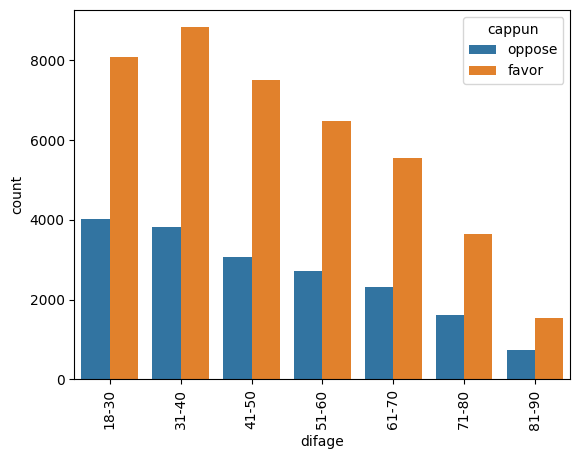

In [50]:
my_plot = sns.countplot(df, x="difage", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

Most people favor capital punishment rather than oppose it. 31-40 year olds favor capital punishment the most with the highest frequency.

<Axes: xlabel='difage'>

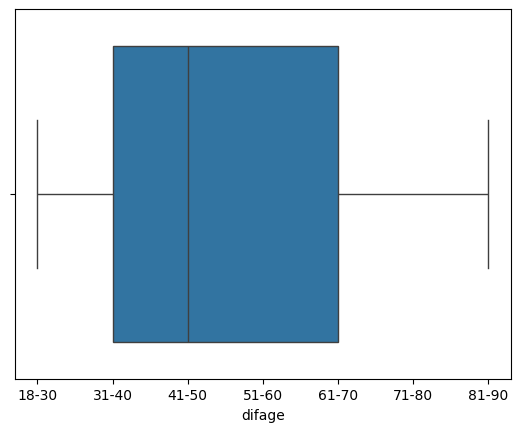

In [51]:
# Box plot of age groups
var = 'difage'
sns.boxplot(data=df, x=var)

<Axes: xlabel='educ', ylabel='Density'>

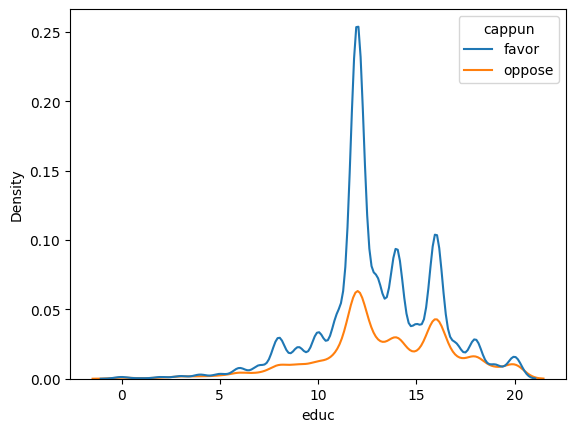

In [70]:
sns.kdeplot(data=df, x="educ", hue="cappun") # Grouped by case-type

<Axes: xlabel='educ', ylabel='Density'>

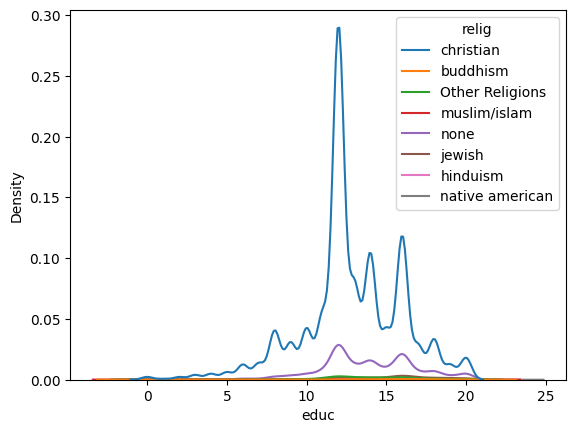

In [72]:
sns.kdeplot(data=df, x="educ", hue="relig") # Grouped by case-type

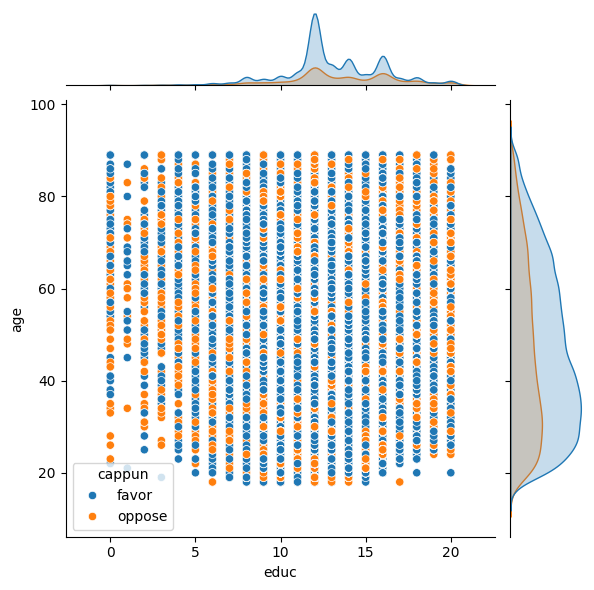

In [78]:
sns.jointplot(x='educ',y='age',data=df,hue='cappun') # Check out that plot!

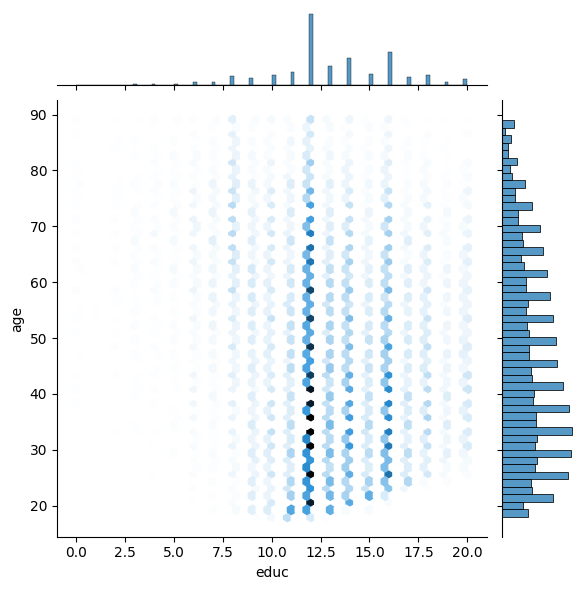

In [80]:
sns.jointplot(x='educ',y='age',data=df,kind='hex') # More evenly distributed

<Axes: xlabel='age', ylabel='Density'>

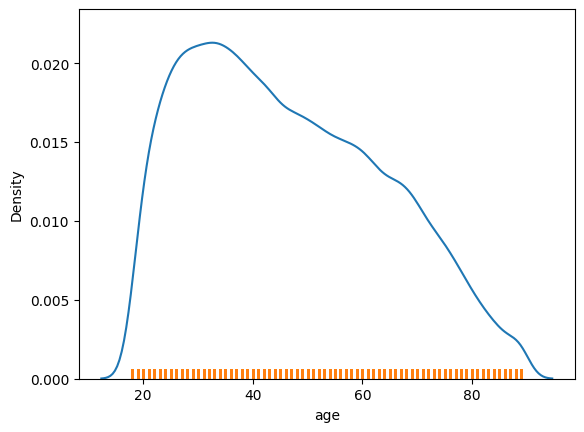

In [82]:
sns.kdeplot(data=df,x='age')
sns.rugplot(data=df, x="age")